# Predicting Students Maths Performance

### Phase 2: Statistical Modelling

### Group Number: 49

#### Group member names and student ID's:

    Ibrahim Al-Ashhab    s3953973
    Abhijeet Kumar       s3905291
    Philip Goutama       s3948643
    Rashik Raj           s3931830
    Kawish Raj           s3931853

## Table Of Contents
- [Introduction](#Introduction)
    - [Phase 1 Summary](#Phase1Summary)
    - [Report Overview](#ReportOverview)
    - [Overview of Methodology](#OverviewofMethodology)
    
- [Statistical Modelling](#StatisticalModelling)
    - [Full Model Overview](#FullModelOverview)
    - [Model Fitting](#ModelFitting)
    - [Neural Network Model Fitting & Tuning](#NNMFT)

- [Critique & Limitations](#Critique&Limitations)
    
- [Summary & Conclusions](#Summary&Conclusions)
    - [Project Summary](#ProjectSummary)
    - [Summary of Findings](#SummaryofFindings)
    - [Conclusions](#Conclusions)
    
- [References](#References)

## Introduction <a id="Introduction"></a>

### Phase 1 Summary <a id="Phase1Summary"></a>

In phase 1 of our project we performed some data cleaning and preprocessing. This was minimal though as our dataset was mostly ready to work with. We also used libraries like seaborn and matplotlib to plot graphs and extract useful information about our dataset. This helped us establish some associations between various attributes and our target variable. We concluded that we need to dig deeper and analyze our dataset more to establish some causations and make informed predictions. 

### Report Overview <a id="ReportOverview"></a>

A complete and accurate overview of the contents of your Phase 2 report. Clarification: A Table of Contents is not a report overview.

### Overview of Methodology <a id="OverviewofMethodology"></a>

A detailed, complete, and accurate overview of your statistical modelling methodology (which is multiple linear regression). More specifically, in this subsection, you will provide a summary of your "Statistical Modelling" section below.

## Statistical Modelling <a id="StatisticalModelling"></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

### Full Model Overview <a id="FullModelOverview"></a>

In [36]:
data = pd.read_csv('Maths_scores.csv')

In [37]:
data.head()

,school,sex,age,study_time,medu,fedu,failures,school_sup,fam_sup,absences,fam_rel,p_status,g1,g2,g3
0,0,0,18,2,4,4,0,1,0,6,4,0,5,6,6
1,0,0,17,2,1,1,0,0,1,4,5,1,5,5,6
2,0,0,15,2,1,1,3,1,0,10,4,1,7,8,10
3,0,0,15,3,4,2,0,0,1,2,3,1,15,14,15
4,0,0,16,2,3,3,0,0,1,4,4,1,6,10,10


In [38]:
formula = 'g3 ~ ' + ' + '.join(data.drop(columns='g3').columns)
print('formula: ', formula)

formula:  g3 ~ school + sex + age + study_time + medu + fedu + failures + school_sup + fam_sup + absences + fam_rel + p_status + g1 + g2


In [62]:
model_full = sm.formula.ols(formula=formula, data=data)
model_full_fitted = model_full.fit()

print(model_full_fitted.summary())
print(f"Regression number of terms: {len(model_full_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_full_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_full_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_full_fitted.rsquared_adj:.4f}")

                            OLS Regression Results                            
Dep. Variable:                     g3   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          1.21e-140
Time:                        16:03:53   Log-Likelihood:                -801.38
No. Observations:                 395   AIC:                             1633.
Df Residuals:                     380   BIC:                             1692.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1891      1.613      0.117      0.9

In [41]:
residuals_full = pd.DataFrame({'actual': data['g3'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,6,4.833148,1.166852
1,6,4.147911,1.852089
2,10,7.246146,2.753854
3,15,14.101210,0.898790
4,10,8.804197,1.195803
5,15,16.114520,-1.114520
6,11,11.675173,-0.675173
7,6,4.459877,1.540123
8,19,18.866054,0.133946
9,15,15.435392,-0.435392


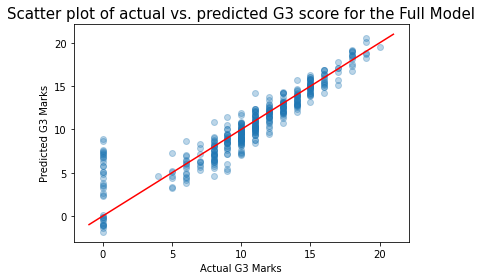

In [43]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual G3 Marks');
plt.ylabel('Predicted G3 Marks');
plt.title('Scatter plot of actual vs. predicted G3 score for the Full Model', fontsize=15);
plt.show();

### Model Fitting <a id="ModelFitting"></a>

### Neural Network Model Fitting & Tuning <a id="NNMFT"></a>

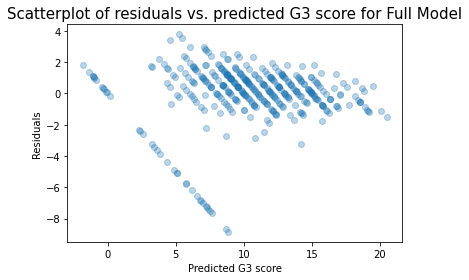

In [49]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted G3 score');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. predicted G3 score for Full Model', fontsize=15)
plt.show();

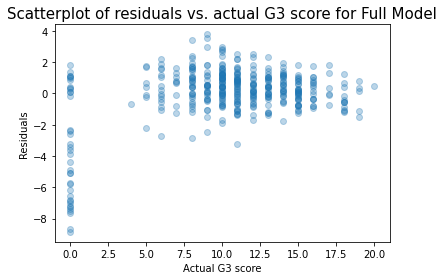

In [52]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual G3 score');
plt.ylabel('Residuals')
plt.title('Scatterplot of residuals vs. actual G3 score for Full Model', fontsize=15)
plt.show();

model overestimates students with 0 marks and underestimates students with marks in range 5-15

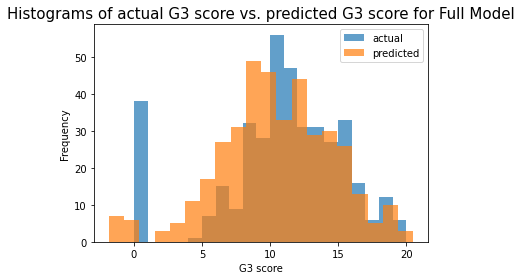

In [54]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('G3 score');
plt.ylabel('Frequency');
plt.title('Histograms of actual G3 score vs. predicted G3 score for Full Model', fontsize=15);
plt.legend()
plt.show();

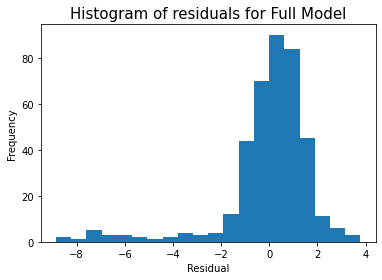

In [55]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of residuals for Full Model', fontsize=15);
plt.show();

### Backwards Feature Selection<a href="#Backwards-Feature-Selection" class="anchor-link"></a>

We now perform backwards feature selection using p-values. It appears
`Statsmodels` does not have any canned code for automatic feature
selection, so we wrote one ourselves.

In [59]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    

    linreg_fit = smf.ols(formula=patsy_description, data=data).fit()

###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data).fit()
###

#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "p_status" with p-value 0.4892

Removing term "sex" with p-value 0.4082

Removing term "fam_sup" with p-value 0.369

Removing term "medu" with p-value 0.3224

Removing term "fedu" with p-value 0.3331

Removing term "school_sup" with p-value 0.2314

Removing term "failures" with p-value 0.1949

Removing term "study_time" with p-value 0.2261

Removing term "school" with p-value 0.1174

***
                            OLS Regression Results                            
Dep. Variable:                     g3   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     389.8
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          5.12e-149
Time:                        16:00:51   Log-Likelihood:                -806.98
No. Observations:                 395   AIC:                    

This model returns an Adjusted R-squared of 0.8336, meaning the reduced
model still explains about 40% of the variance, but with 9 less
variables. Looking at the p-values, they are all significant at the 5%
level, as expected. From Figure 13, we still have the same issues with
our model. That is, the model overestimates younger ages and
underestimates older ages. We will now perform the diagnostic checks on
this reduced model.

### Reduced Model Diagnostic Checks<a href="#Reduced-Model-Diagnostic-Checks" class="anchor-link"></a>

Let's first get a scatter plot of residuals (as a function of predicted
age).

In [60]:
residuals_reduced = pd.DataFrame({'actual': data['g3'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,6,4.641163,1.358837
1,6,4.134732,1.865268
2,10,7.692765,2.307235
3,15,14.118109,0.881891
4,10,9.027317,0.972683
5,15,15.958202,-0.958202
6,11,11.756458,-0.756458
7,6,4.022736,1.977264
8,19,18.458168,0.541832
9,15,15.565396,-0.565396


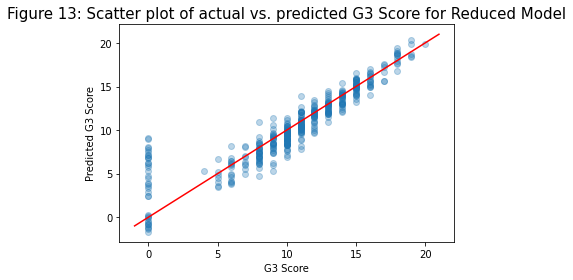

In [61]:
# get a scatter plot
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('G3 Score');
plt.ylabel('Predicted G3 Score');
plt.title('Figure 13: Scatter plot of actual vs. predicted G3 Score for Reduced Model', fontsize=15);
plt.show(); 

## Critique & Limitations <a id="Critique&Limitations"></a>

## Summary & Conclusions <a id="Summary&Conclusions"></a>

### Project Summary <a id="ProjectSummary"></a>

### Summary of Findings <a id="SummaryofFindings"></a>

### Conclusions <a id="Conclusions"></a>

## References <a id="References"></a>